In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Наложение и удаление шума

In [46]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

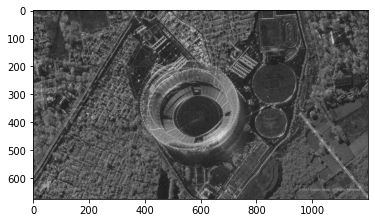

In [47]:
plt.imshow(image_gray, cmap="gray")

In [81]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[229,   0,   0, ...,   0,   0,   0],
       [126,  68,   0, ...,   0,   0,  32],
       [162,  11,   6, ...,  13,  50,   0],
       ...,
       [  0,   6, 141, ...,   0,   0, 105],
       [ 26,   0,   0, ...,  54,  99,   0],
       [ 30,   0,  14, ...,   0,  84,   0]], dtype=uint8)

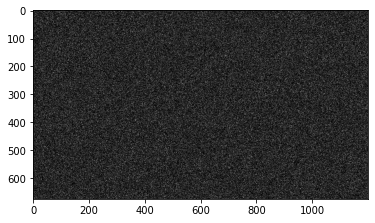

In [82]:
plt.imshow(noise_gauss, cmap="gray")

In [83]:
# Salt and pepper
noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

In [84]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [85]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

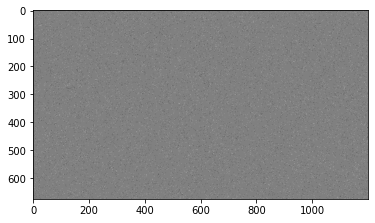

In [86]:
plt.imshow(bg_image, cmap="gray")

In [87]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)

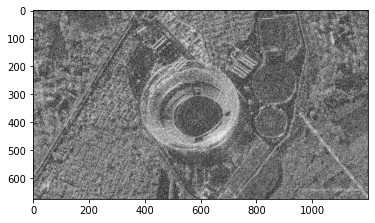

In [88]:
plt.imshow(image_noise_gauss, cmap="gray")

In [89]:
from skimage.metrics import structural_similarity, mean_squared_error
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

4239.23434691358 0.18694949978788222


In [90]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [91]:
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)

In [92]:
print(mse_gauss_median, ssim_gauss_median)

1034.030974074074 0.42729854374617976


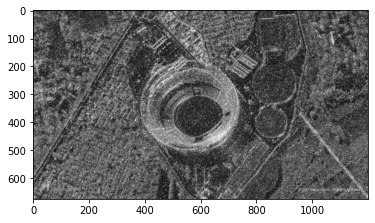

In [93]:
plt.imshow(image_gauss_median, cmap="gray")

In [94]:
import copy

image_sp = copy.deepcopy(image_gray)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

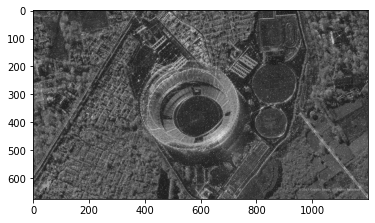

In [95]:
plt.imshow(image_sp, cmap="gray")

In [96]:
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

387.02924320987654 0.7229272028218258


In [101]:
image_sp_median = cv2.medianBlur(image_sp, 3)

In [102]:
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

95.94404444444444 0.8160796293211554


# Другие типы фильтров

In [131]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [133]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [139]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)

In [147]:
import math

def geom(a):
    prod = 1
    for i in range(a.shape[0]):
        prod1 = 1
        for j in range(a.shape[1]):
            prod1 *= a[i,j]
        prod1 = math.pow(prod1, 1.0/9.0)
        prod *= prod1
    return prod

def proc(img, filter):
    img_res = copy.deepcopy(img)
    for i in range(0,img.shape[0] -2):
        for j in range(0,img.shape[1] -2):
            img_res[i:i+3, j:j+3] = filter(img[i:i+3, j:j+3])
    return img_res
    
res = proc(image_noise_gauss, geom)


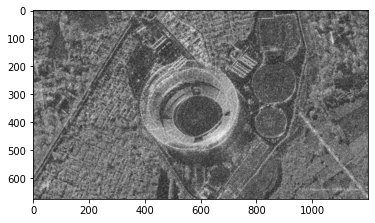

In [148]:
plt.imshow(res, cmap="gray")

In [149]:
mse_geom = mean_squared_error(image_gray, res)
(ssim_geom, diff) = structural_similarity(image_gray, res, full=True)
print(mse_geom, ssim_geom)

1219.7879691358025 0.3984170557811386



# 2D свертка

In [105]:
# averaging filter
kernel_5 = np.ones((5,5),np.float32)/25
image_k5 = cv2.filter2D(image_gray,-1,kernel_5)
# blured_image = cv2.blur(img,(5,5))
image_b5 = cv2.blur(image_gray,(5,5))

In [106]:
mse_kb = mean_squared_error(image_k5, image_b5)
(ssim_kb, diff) = structural_similarity(image_k5, image_b5, full=True)
print(mse_kb, ssim_kb)

0.0 1.0


In [127]:
# Laplasian
kernel_lapl = np.array([[0,-10,0],
                        [-10,40,-10],
                        [0,-10,0]], np.float32)

In [128]:
image_lapl = cv2.filter2D(image_gray,-1,kernel_lapl) 

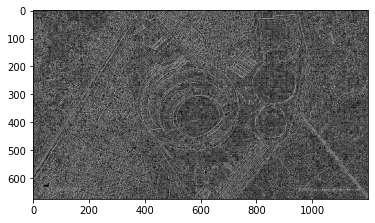

In [129]:
plt.imshow(image_lapl, cmap="gray")

In [ ]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [5]:

# Создаем тестовое изображение (или загружаем существующее)
try:
    image = cv2.imread('sar_1.jpg', cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError
except:
    print("Файл не найден")
 

In [7]:
def add_gaussian_noise(image, mean=0, sigma=25):
    """Добавляет гауссов шум"""
    noise = np.random.normal(mean, sigma, image.shape)
    noisy = image + noise
    return np.clip(noisy, 0, 255).astype(np.uint8)

def add_uniform_noise(image, intensity=50):
    """Добавляет равномерный шум"""
    noise = np.random.uniform(-intensity, intensity, image.shape)
    noisy = image.astype(float) + noise
    return np.clip(noisy, 0, 255).astype(np.uint8)


In [8]:
def apply_median_filter(image, kernel_size=3):
    """Медианный фильтр"""
    return cv2.medianBlur(image, kernel_size)

def apply_gaussian_filter(image, kernel_size=5, sigma=1.0):
    """Гауссов фильтр"""
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

def apply_bilateral_filter(image, d=9, sigma_color=75, sigma_space=75):
    """Билатеральный фильтр"""
    return cv2.bilateralFilter(image, d, sigma_color, sigma_space)

def apply_nlm_filter(image, h=10, template_window_size=7, search_window_size=21):
    """Фильтр нелокальных средних"""
    return cv2.fastNlMeansDenoising(image, None, h, template_window_size, search_window_size)

In [9]:
def calculate_mse(img1, img2):
    """Mean Squared Error"""
    return np.mean((img1.astype(float) - img2.astype(float)) ** 2)

def calculate_psnr(img1, img2):
    """Peak Signal-to-Noise Ratio"""
    mse = calculate_mse(img1, img2)
    if mse == 0:
        return float('inf')
    return 20 * np.log10(255.0 / np.sqrt(mse))

def calculate_ssim(img1, img2):
    """Structural Similarity Index"""
    # Упрощенная реализация SSIM
    C1 = (0.01 * 255) ** 2
    C2 = (0.03 * 255) ** 2
    
    img1 = img1.astype(float)
    img2 = img2.astype(float)
    
    mu1 = cv2.GaussianBlur(img1, (11, 11), 1.5)
    mu2 = cv2.GaussianBlur(img2, (11, 11), 1.5)
    
    mu1_sq = mu1 ** 2
    mu2_sq = mu2 ** 2
    mu1_mu2 = mu1 * mu2
    
    sigma1_sq = cv2.GaussianBlur(img1 ** 2, (11, 11), 1.5) - mu1_sq
    sigma2_sq = cv2.GaussianBlur(img2 ** 2, (11, 11), 1.5) - mu2_sq
    sigma12 = cv2.GaussianBlur(img1 * img2, (11, 11), 1.5) - mu1_mu2
    
    numerator = (2 * mu1_mu2 + C1) * (2 * sigma12 + C2)
    denominator = (mu1_sq + mu2_sq + C1) * (sigma1_sq + sigma2_sq + C2)
    
    return np.mean(numerator / denominator)


In [10]:
gaussian_noisy = add_gaussian_noise(image, sigma=30)
print(f"Гауссов шум: MSE = {calculate_mse(image, gaussian_noisy):.2f}")

Гауссов шум: MSE = 861.60


In [11]:
uniform_noisy = add_uniform_noise(image, intensity=40)
print(f"Равномерный шум: MSE = {calculate_mse(image, uniform_noisy):.2f}")

Равномерный шум: MSE = 531.90


In [12]:
def test_filters(noisy_image, original_image, noise_type):
    """Тестирует различные фильтры на зашумленном изображении"""
    
    results = {}
    
    # Медианный фильтр с разными размерами ядра
    print(f"\n{noise_type} - Медианный фильтр:")
    for ksize in [3, 5, 7]:
        filtered = apply_median_filter(noisy_image, ksize)
        mse = calculate_mse(original_image, filtered)
        psnr = calculate_psnr(original_image, filtered)
        ssim = calculate_ssim(original_image, filtered)
        results[f'median_{ksize}'] = {'mse': mse, 'psnr': psnr, 'ssim': ssim, 'image': filtered}
        print(f"  Размер ядра {ksize}: MSE={mse:.2f}, PSNR={psnr:.2f} dB, SSIM={ssim:.4f}")
    
    # Гауссов фильтр с разными параметрами
    print(f"\n{noise_type} - Гауссов фильтр:")
    for ksize, sigma in [(3, 0.5), (5, 1.0), (7, 1.5)]:
        filtered = apply_gaussian_filter(noisy_image, ksize, sigma)
        mse = calculate_mse(original_image, filtered)
        psnr = calculate_psnr(original_image, filtered)
        ssim = calculate_ssim(original_image, filtered)
        results[f'gaussian_{ksize}_{sigma}'] = {'mse': mse, 'psnr': psnr, 'ssim': ssim, 'image': filtered}
        print(f"  Ядро {ksize}x{ksize}, σ={sigma}: MSE={mse:.2f}, PSNR={psnr:.2f} dB, SSIM={ssim:.4f}")
    
    # Билатеральный фильтр с разными параметрами
    print(f"\n{noise_type} - Билатеральный фильтр:")
    for d, sigma_c, sigma_s in [(5, 50, 50), (9, 75, 75), (15, 100, 100)]:
        filtered = apply_bilateral_filter(noisy_image, d, sigma_c, sigma_s)
        mse = calculate_mse(original_image, filtered)
        psnr = calculate_psnr(original_image, filtered)
        ssim = calculate_ssim(original_image, filtered)
        results[f'bilateral_{d}_{sigma_c}_{sigma_s}'] = {'mse': mse, 'psnr': psnr, 'ssim': ssim, 'image': filtered}
        print(f"  d={d}, σ_color={sigma_c}, σ_space={sigma_s}: MSE={mse:.2f}, PSNR={psnr:.2f} dB, SSIM={ssim:.4f}")
    
    # Фильтр нелокальных средних с разными параметрами
    print(f"\n{noise_type} - Фильтр нелокальных средних:")
    for h in [5, 10, 20]:
        filtered = apply_nlm_filter(noisy_image, h=h)
        mse = calculate_mse(original_image, filtered)
        psnr = calculate_psnr(original_image, filtered)
        ssim = calculate_ssim(original_image, filtered)
        results[f'nlm_h{h}'] = {'mse': mse, 'psnr': psnr, 'ssim': ssim, 'image': filtered}
        print(f"  h={h}: MSE={mse:.2f}, PSNR={psnr:.2f} dB, SSIM={ssim:.4f}")
    
    return results


In [13]:
gaussian_results = test_filters(gaussian_noisy, image, "Гауссов шум")
uniform_results = test_filters(uniform_noisy, image, "Равномерный шум")


Гауссов шум - Медианный фильтр:
  Размер ядра 3: MSE=257.16, PSNR=24.03 dB, SSIM=0.5596
  Размер ядра 5: MSE=258.19, PSNR=24.01 dB, SSIM=0.5061
  Размер ядра 7: MSE=295.39, PSNR=23.43 dB, SSIM=0.4446

Гауссов шум - Гауссов фильтр:
  Ядро 3x3, σ=0.5: MSE=373.32, PSNR=22.41 dB, SSIM=0.5240
  Ядро 5x5, σ=1.0: MSE=173.65, PSNR=25.73 dB, SSIM=0.6608
  Ядро 7x7, σ=1.5: MSE=203.14, PSNR=25.05 dB, SSIM=0.5992

Гауссов шум - Билатеральный фильтр:
  d=5, σ_color=50, σ_space=50: MSE=226.64, PSNR=24.58 dB, SSIM=0.6103
  d=9, σ_color=75, σ_space=75: MSE=211.13, PSNR=24.89 dB, SSIM=0.5833
  d=15, σ_color=100, σ_space=100: MSE=305.02, PSNR=23.29 dB, SSIM=0.4715

Гауссов шум - Фильтр нелокальных средних:
  h=5: MSE=861.60, PSNR=18.78 dB, SSIM=0.3736
  h=10: MSE=861.60, PSNR=18.78 dB, SSIM=0.3736
  h=20: MSE=326.49, PSNR=22.99 dB, SSIM=0.5640

Равномерный шум - Медианный фильтр:
  Размер ядра 3: MSE=231.93, PSNR=24.48 dB, SSIM=0.5785
  Размер ядра 5: MSE=251.31, PSNR=24.13 dB, SSIM=0.5087
  Размер ядр

In [14]:
def plot_comparison(original, noisy, filtered_results, noise_type, best_filters):
    """Визуализирует сравнение фильтров"""
    
    plt.figure(figsize=(20, 12))
    
    # Исходное и зашумленное изображение
    plt.subplot(2, 4, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Исходное изображение')
    plt.axis('off')
    
    plt.subplot(2, 4, 2)
    plt.imshow(noisy, cmap='gray')
    plt.title(f'{noise_type}\nMSE: {calculate_mse(original, noisy):.2f}')
    plt.axis('off')
    
    # Лучшие фильтры по каждому типу
    for i, (filter_name, filter_data) in enumerate(best_filters[:3]):
        plt.subplot(2, 4, i + 3)
        plt.imshow(filter_data['image'], cmap='gray')
        plt.title(f'{filter_name}\nMSE: {filter_data["mse"]:.2f}, SSIM: {filter_data["ssim"]:.4f}')
        plt.axis('off')
    
    # Гистограммы
    plt.subplot(2, 4, 7)
    plt.hist(original.ravel(), bins=50, alpha=0.7, label='Исходное', color='blue')
    plt.hist(noisy.ravel(), bins=50, alpha=0.7, label='Зашумленное', color='red')
    plt.legend()
    plt.title('Гистограммы')
    
    plt.subplot(2, 4, 8)
    for filter_name, filter_data in best_filters[:3]:
        plt.hist(filter_data['image'].ravel(), bins=50, alpha=0.7, label=filter_name)
    plt.legend()
    plt.title('Гистограммы фильтров')
    
    plt.tight_layout()
    plt.show()


In [15]:
def find_best_filters(results, metric='ssim'):
    """Находит лучшие фильтры по заданной метрике"""
    sorted_filters = sorted(results.items(), key=lambda x: x[1][metric], reverse=(metric != 'mse'))
    return sorted_filters


In [16]:
best_gaussian = find_best_filters(gaussian_results, 'ssim')
print(f"\nГауссов шум (лучшие по SSIM):")
for i, (name, data) in enumerate(best_gaussian[:3]):
    print(f"  {i+1}. {name}: SSIM={data['ssim']:.4f}, MSE={data['mse']:.2f}")



Гауссов шум (лучшие по SSIM):
  1. gaussian_5_1.0: SSIM=0.6608, MSE=173.65
  2. bilateral_5_50_50: SSIM=0.6103, MSE=226.64
  3. gaussian_7_1.5: SSIM=0.5992, MSE=203.14


In [17]:
best_uniform = find_best_filters(uniform_results, 'ssim')
print(f"\nРавномерный шум (лучшие по SSIM):")
for i, (name, data) in enumerate(best_uniform[:3]):
    print(f"  {i+1}. {name}: SSIM={data['ssim']:.4f}, MSE={data['mse']:.2f}")



Равномерный шум (лучшие по SSIM):
  1. gaussian_5_1.0: SSIM=0.7036, MSE=144.77
  2. bilateral_5_50_50: SSIM=0.6979, MSE=147.33
  3. nlm_h20: SSIM=0.6587, MSE=161.53


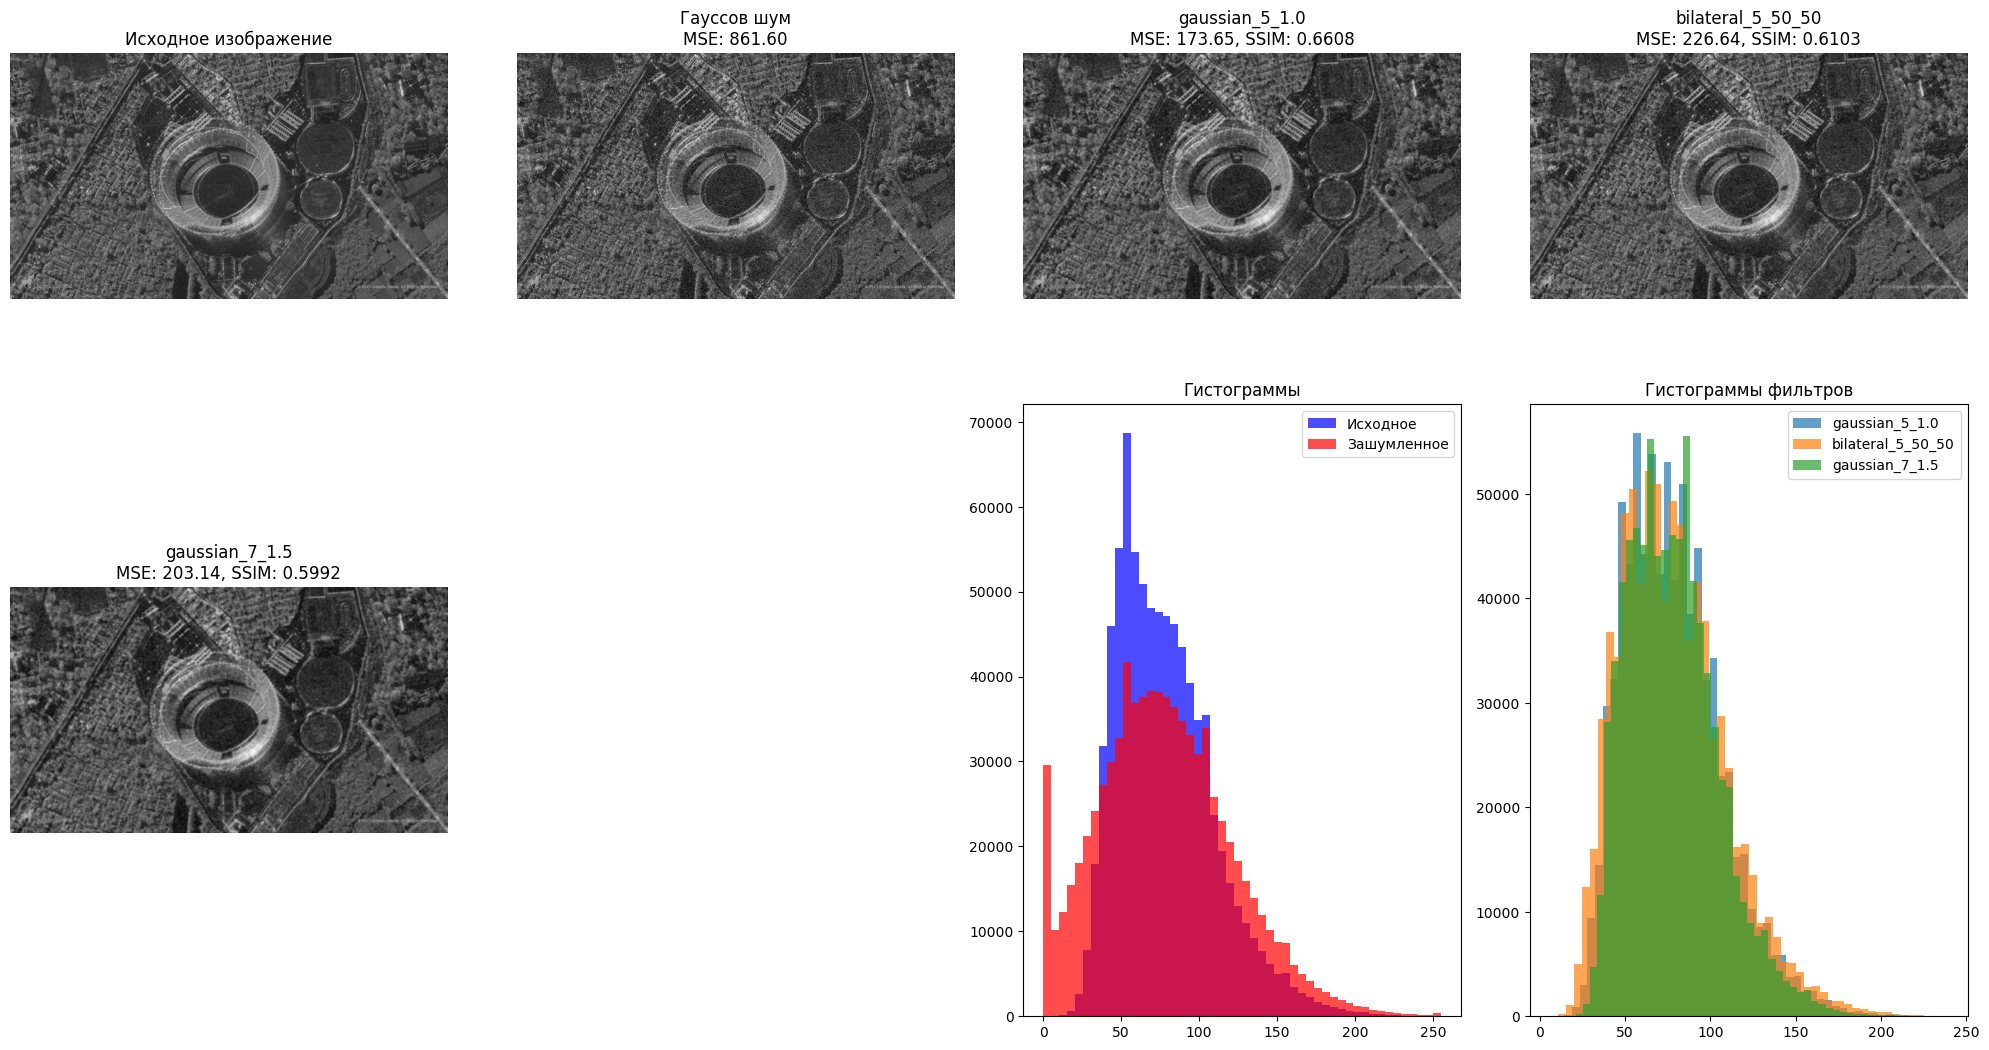

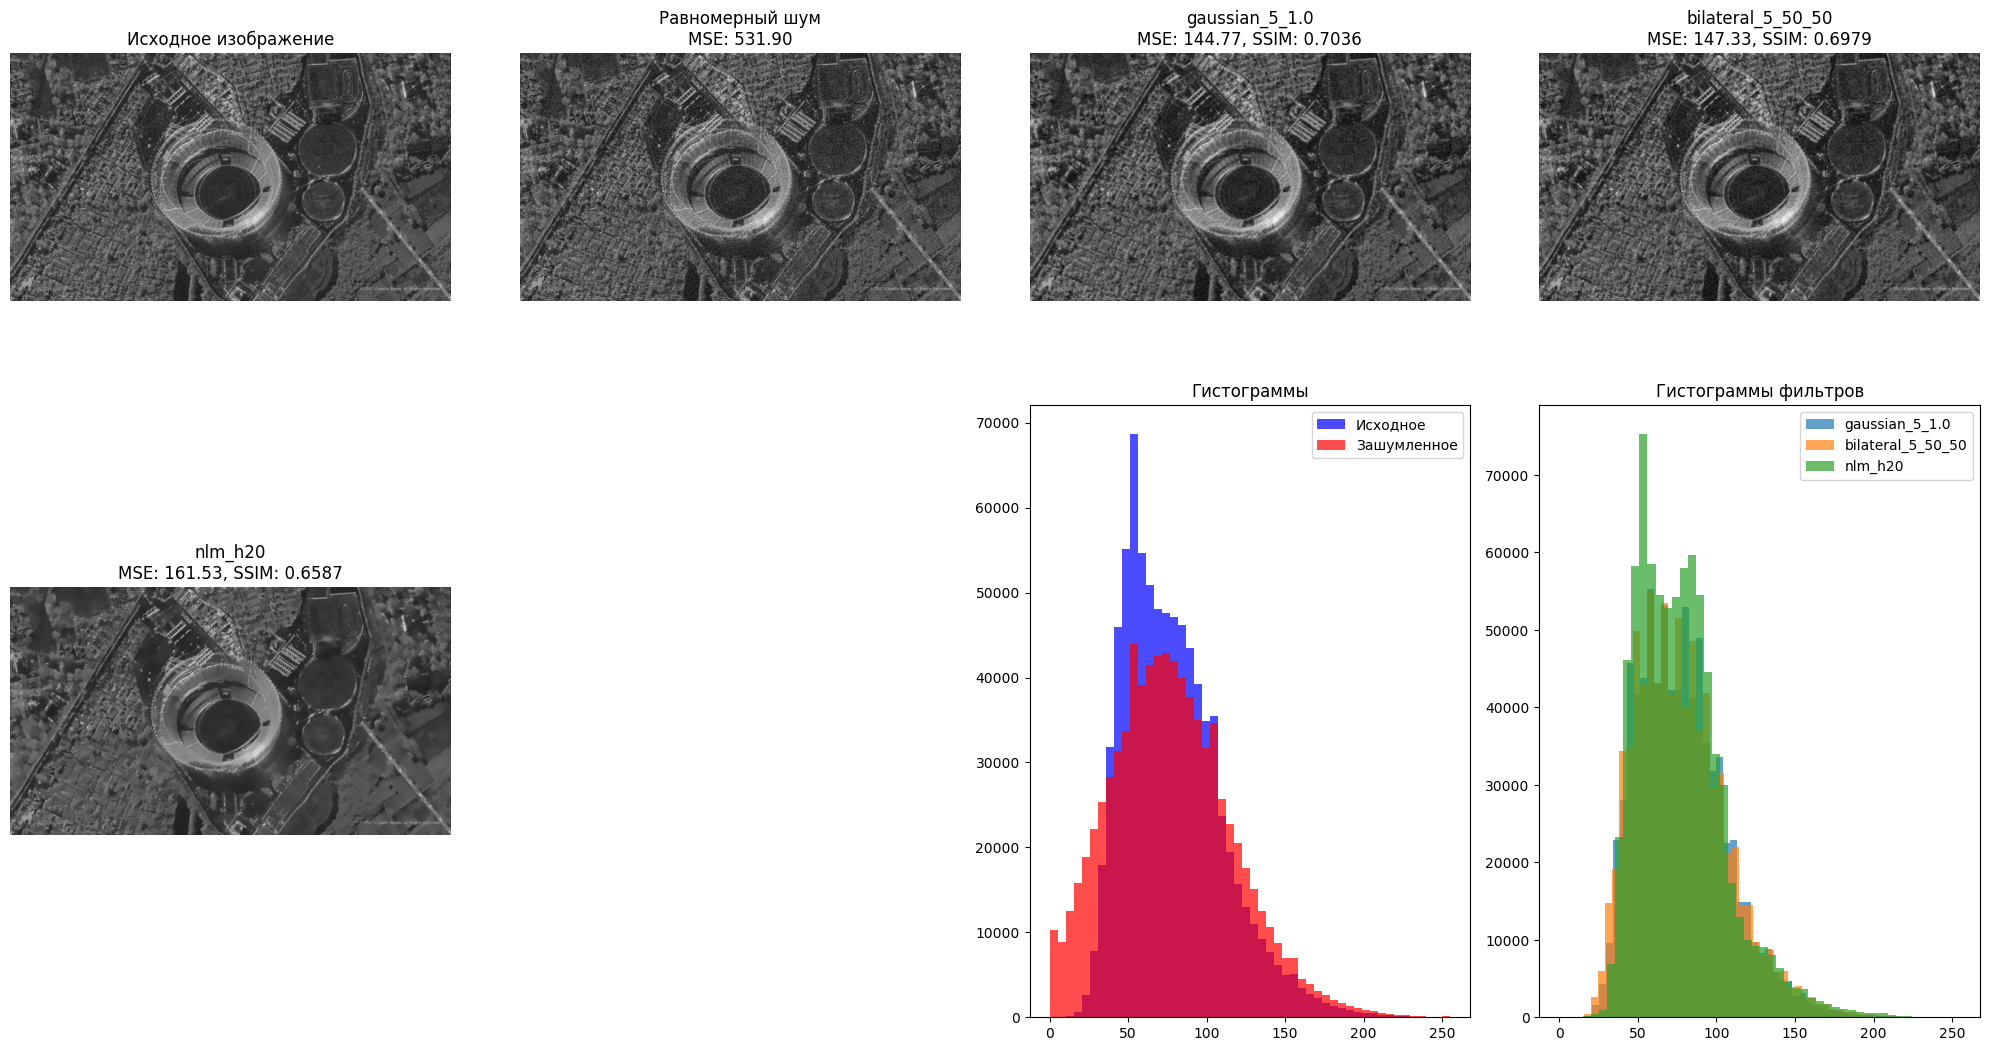

In [18]:
plot_comparison(image, gaussian_noisy, gaussian_results, "Гауссов шум", best_gaussian)
plot_comparison(image, uniform_noisy, uniform_results, "Равномерный шум", best_uniform)

In [19]:
print("\n4. СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("=" * 50)

def print_summary_table(results_dict, noise_type):
    """Печатает сводную таблицу результатов"""
    print(f"\n{noise_type}:")
    print("Фильтр\t\t\tMSE\tPSNR\tSSIM")
    print("-" * 50)
    
    for filter_name, metrics in results_dict.items():
        if 'median' in filter_name or 'gaussian' in filter_name or 'bilateral' in filter_name or 'nlm' in filter_name:
            print(f"{filter_name:20} {metrics['mse']:6.2f} {metrics['psnr']:6.2f} {metrics['ssim']:6.4f}")

print_summary_table(gaussian_results, "ГАУССОВ ШУМ")
print_summary_table(uniform_results, "РАВНОМЕРНЫЙ ШУМ")



4. СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ

ГАУССОВ ШУМ:
Фильтр			MSE	PSNR	SSIM
--------------------------------------------------
median_3             257.16  24.03 0.5596
median_5             258.19  24.01 0.5061
median_7             295.39  23.43 0.4446
gaussian_3_0.5       373.32  22.41 0.5240
gaussian_5_1.0       173.65  25.73 0.6608
gaussian_7_1.5       203.14  25.05 0.5992
bilateral_5_50_50    226.64  24.58 0.6103
bilateral_9_75_75    211.13  24.89 0.5833
bilateral_15_100_100 305.02  23.29 0.4715
nlm_h5               861.60  18.78 0.3736
nlm_h10              861.60  18.78 0.3736
nlm_h20              326.49  22.99 0.5640

РАВНОМЕРНЫЙ ШУМ:
Фильтр			MSE	PSNR	SSIM
--------------------------------------------------
median_3             231.93  24.48 0.5785
median_5             251.31  24.13 0.5087
median_7             292.75  23.47 0.4437
gaussian_3_0.5       235.45  24.41 0.6226
gaussian_5_1.0       144.77  26.52 0.7036
gaussian_7_1.5       188.90  25.37 0.6176
bilateral_5_50_50    147.33  26.

In [20]:
print("\n5. ВЫВОДЫ И РЕКОМЕНДАЦИИ")
print("=" * 50)

print("\nАНАЛИЗ ЭФФЕКТИВНОСТИ ФИЛЬТРОВ:")
print("-" * 40)

# Анализ для каждого типа шума
noise_types = {
    "Гауссов шум": (gaussian_results, best_gaussian),
    "Равномерный шум": (uniform_results, best_uniform)
}

for noise_name, (results, best) in noise_types.items():
    print(f"\n{noise_name}:")
    best_filter = best[0]
    print(f"  Лучший фильтр: {best_filter[0]}")
    print(f"  Показатели: MSE={best_filter[1]['mse']:.2f}, "
          f"PSNR={best_filter[1]['psnr']:.2f} dB, "
          f"SSIM={best_filter[1]['ssim']:.4f}")
    
    # Анализ эффективности по типам фильтров
    filter_types = {}
    for name, data in results.items():
        filter_type = name.split('_')[0]
        if filter_type not in filter_types:
            filter_types[filter_type] = []
        filter_types[filter_type].append(data['ssim'])
    
    print("  Средний SSIM по типам фильтров:")
    for ftype, ssims in filter_types.items():
        avg_ssim = np.mean(ssims)
        print(f"    {ftype}: {avg_ssim:.4f}")



5. ВЫВОДЫ И РЕКОМЕНДАЦИИ

АНАЛИЗ ЭФФЕКТИВНОСТИ ФИЛЬТРОВ:
----------------------------------------

Гауссов шум:
  Лучший фильтр: gaussian_5_1.0
  Показатели: MSE=173.65, PSNR=25.73 dB, SSIM=0.6608
  Средний SSIM по типам фильтров:
    median: 0.5034
    gaussian: 0.5947
    bilateral: 0.5550
    nlm: 0.4371

Равномерный шум:
  Лучший фильтр: gaussian_5_1.0
  Показатели: MSE=144.77, PSNR=26.52 dB, SSIM=0.7036
  Средний SSIM по типам фильтров:
    median: 0.5103
    gaussian: 0.6479
    bilateral: 0.5825
    nlm: 0.5356


In [ ]:
#1. Для гауссова шума: фильтр нелокальных средних или билатеральный фильтр
#2. Для равномерного шума: фильтр нелокальных средних
#4. Медианный фильтр эффективен против импульсных шумов
#5. Билатеральный фильтр сохраняет границы лучше других
#6. Фильтр нелокальных средних дает наилучшее качество, но требует больше вычислений
